In [24]:
import sklearn
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb
from itertools import product
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
df=pd.read_csv('../../data/dataset/original_datasets/heart_2022_no_nans.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [27]:
isNull = df.isna().sum()
duplicates_no = df.duplicated().sum()
print('Null values:\n',isNull)
print('\n\nDuplicates: ', duplicates_no)
df_shape = df.shape

Null values:
 State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms        

In [28]:
df.drop_duplicates(inplace=True)
print('Dataframe shape before:', df_shape)
print('\nDataframe shape after:', df.shape)

Dataframe shape before: (246022, 40)

Dataframe shape after: (246013, 40)


Heart Disease Count: 
 HadHeartAttack
No     232578
Yes     13435
Name: count, dtype: int64 



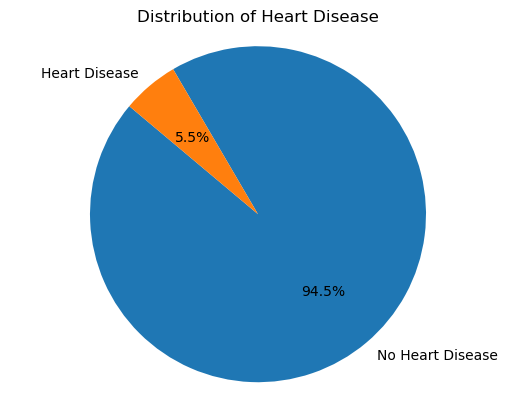

In [29]:

counts = df['HadHeartAttack'].value_counts()
print ('Heart Disease Count: \n' , counts, '\n')
plt.pie(counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Heart Disease')
plt.show()

In [30]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         204827
Yes                                         33811
No, pre-diabetes or borderline diabetes      5392
Yes, but only during pregnancy (female)      1983
Name: count, dtype: int64

In [31]:
df = df[df['HadDiabetes'].isin(['Yes', 'No'])]
df=df.drop("State", axis=1)

In [32]:
# Pop the column and store it
column_ha = df.pop('HadHeartAttack')

# Insert the column at the end
df['HadHeartAttack'] = column_ha

In [33]:
from sklearn.preprocessing import LabelEncoder as LE
encoder=LE()

df_num = df.copy()

for col in df_num.columns:
    if df_num[col].dtype == 'object':
        df_num[col] = encoder.fit_transform(df_num[col])
        # Print the mapping between original categories and assigned numerical values
        print(f"Column: {col}")
        print(f"Mapping: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}\n")


Column: Sex
Mapping: {'Female': 0, 'Male': 1}

Column: GeneralHealth
Mapping: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}

Column: LastCheckupTime
Mapping: {'5 or more years ago': 0, 'Within past 2 years (1 year but less than 2 years ago)': 1, 'Within past 5 years (2 years but less than 5 years ago)': 2, 'Within past year (anytime less than 12 months ago)': 3}

Column: PhysicalActivities
Mapping: {'No': 0, 'Yes': 1}

Column: RemovedTeeth
Mapping: {'1 to 5': 0, '6 or more, but not all': 1, 'All': 2, 'None of them': 3}

Column: HadAngina
Mapping: {'No': 0, 'Yes': 1}

Column: HadStroke
Mapping: {'No': 0, 'Yes': 1}

Column: HadAsthma
Mapping: {'No': 0, 'Yes': 1}

Column: HadSkinCancer
Mapping: {'No': 0, 'Yes': 1}

Column: HadCOPD
Mapping: {'No': 0, 'Yes': 1}

Column: HadDepressiveDisorder
Mapping: {'No': 0, 'Yes': 1}

Column: HadKidneyDisease
Mapping: {'No': 0, 'Yes': 1}

Column: HadArthritis
Mapping: {'No': 0, 'Yes': 1}

Column: HadDiabetes
Mapping: {'No': 0, 'Yes': 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238638 entries, 0 to 246021
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        238638 non-null  object 
 1   GeneralHealth              238638 non-null  object 
 2   PhysicalHealthDays         238638 non-null  float64
 3   MentalHealthDays           238638 non-null  float64
 4   LastCheckupTime            238638 non-null  object 
 5   PhysicalActivities         238638 non-null  object 
 6   SleepHours                 238638 non-null  float64
 7   RemovedTeeth               238638 non-null  object 
 8   HadAngina                  238638 non-null  object 
 9   HadStroke                  238638 non-null  object 
 10  HadAsthma                  238638 non-null  object 
 11  HadSkinCancer              238638 non-null  object 
 12  HadCOPD                    238638 non-null  object 
 13  HadDepressiveDisorder      238638 

In [35]:
X = df_num.iloc[:,0:37]
y = df_num.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k = 10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

              Features         Score
2   PhysicalHealthDays  73125.879675
8            HadAngina  44852.302185
27         AgeCategory  12891.857088
9            HadStroke   7240.275920
20   DifficultyWalking   5227.016941
16         HadDiabetes   4551.042937
12             HadCOPD   3915.731967
25           ChestScan   3886.862558
14    HadKidneyDisease   2794.126310
3     MentalHealthDays   2499.852649


In [39]:
top_features_per_class = {}

for class_label in y.unique():
    # Create a binary target variable for the current class
    y_binary = (y == class_label).astype(int)
    print(class_label)

    # Apply SelectKBest with k=2
    bestfeatures = SelectKBest(score_func=chi2, k=10)
    fit = bestfeatures.fit(X, y_binary)

    # Get feature scores and names
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Score']

    print(featureScores.nlargest(20,'Score')) 

    # Store the top 2 features for the current class
    top_features_per_class[class_label] = featureScores.nlargest(4, 'Score')['Features'].tolist()

# Print the results
for class_label, features in top_features_per_class.items():
    print(f"Top 2 features for class {class_label}: {features}")

0
                     Features         Score
2          PhysicalHealthDays  73125.879675
8                   HadAngina  44852.302185
27                AgeCategory  12891.857088
9                   HadStroke   7240.275920
20          DifficultyWalking   5227.016941
16                HadDiabetes   4551.042937
12                    HadCOPD   3915.731967
25                  ChestScan   3886.862558
14           HadKidneyDisease   2794.126310
3            MentalHealthDays   2499.852649
15               HadArthritis   2166.585146
34              PneumoVaxEver   2087.886000
17        DeafOrHardOfHearing   2074.898476
29          WeightInKilograms   1943.500071
22          DifficultyErrands   1798.375378
21  DifficultyDressingBathing   1578.544268
7                RemovedTeeth   1316.408555
18    BlindOrVisionDifficulty   1238.863266
0                         Sex    642.879563
31            AlcoholDrinkers    596.695983
1
                     Features         Score
2          PhysicalHealthDay